In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [1]:
from ipynb.fs.full.preprocess_dataset import generate_dataframe

In [2]:
df = generate_dataframe(20)

In [3]:
df

,Post,Label,code
0,viable option youll leaving wife behind youd p...,Supportive,4
1,hard appreciate notion could meet someone else...,Ideation,2
2,hi last night wa sitting ledge window contempl...,Behavior,1
3,tried kill self failed badly cause moment want...,Attempt,0
4,hi nem3030 sort thing enjoy personally always ...,Ideation,2
...,...,...,...
55,Psoralen and long-wave ultraviolet radiation ...,Indicator,3
11,Disorder of central nervous system co-occurre...,Indicator,3
14,Inhalant-induced mood disorder Severe recurre...,Indicator,3
31,Hypertrophic scarring of skin donor site Dres...,Indicator,3


In [17]:
df.Label.value_counts()

Ideation      195
Indicator     176
Supportive    108
Behavior       85
Attempt        52
Name: Label, dtype: int64

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
seq_len = [len(i.split()) for i in df.Post.values]

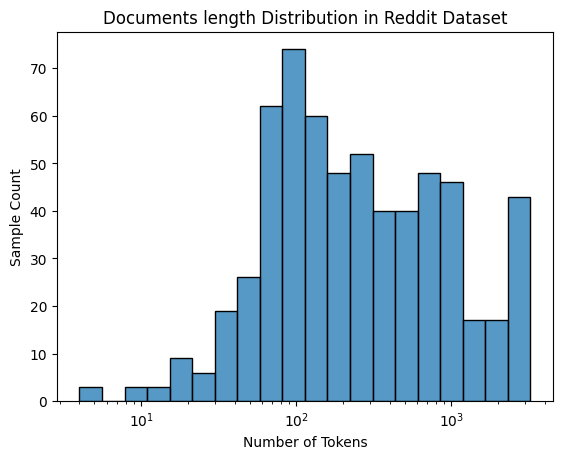

In [15]:
ax = sns.histplot(data=seq_len, log_scale=True, bins=20)
ax.set(ylabel='Sample Count', xlabel='Number of Tokens', title='Documents length Distribution in Reddit Dataset')
plt.show()

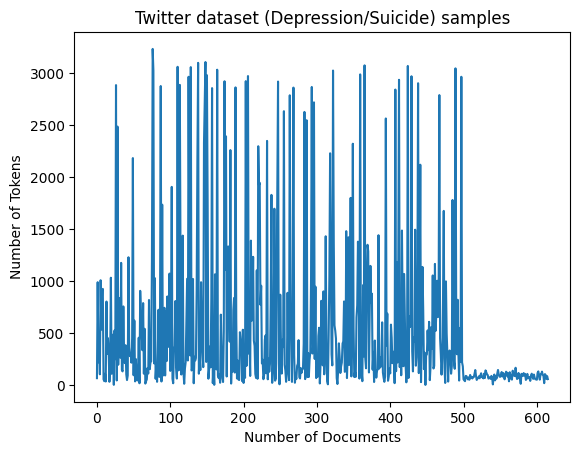

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(seq_len) # plotting by columns
plt.ylabel('Number of Tokens')
plt.xlabel('Number of Documents')
plt.title('Twitter dataset (Depression/Suicide) samples')
plt.show()

<AxesSubplot:>

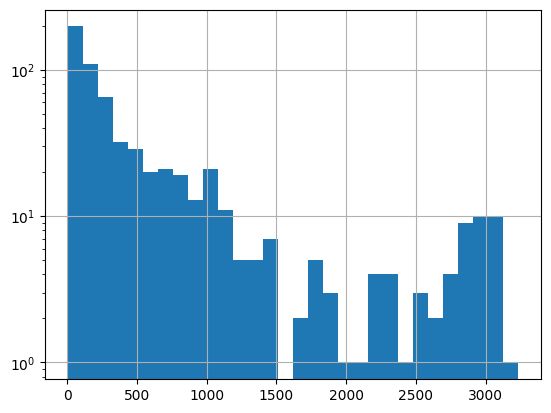

In [7]:
pd.Series([len(i.split()) for i in df.Post.values]).hist(bins=30, log=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['Post'],df['code'], stratify=df['code'])
X_train.head(4)

374    feel youre ache pal world feel hyperactive beh...
449    arent exaggerating anything everything relativ...
158    hobby moved also plan anything life money feel...
14      Schizophrenic Sadness Severe depressive episo...
Name: Post, dtype: object

In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text


2022-12-12 09:52:26.479831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 09:52:26.909144: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-12 09:52:26.909198: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-12 09:52:28.442446: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [ ]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/jeongukjae/distilbert_en_uncased_preprocess/2')
bert_encoder = hub.KerasLayer('https://tfhub.dev/jeongukjae/distilbert_en_uncased_L-6_H-768_A-12/1')

2022-12-12 09:52:48.147505: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-12 09:52:48.147817: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-12 09:52:48.147884: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ifte-HomePC): /proc/driver/nvidia/version does not exist
2022-12-12 09:52:48.148668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [ ]:
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(len(df.code.unique()), activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 2e-5
# we will do just 1 epoch, though multiple epochs might be better as long as we will not overfit the model
number_of_epochs = 1
# choosing Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)
# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [31]:
# model.compile(optimizer='adam', 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size = 100)

Epoch 1/10
3/3 [==============================] - 17s 5s/step - loss: 1.5007 - accuracy: 0.1939
Epoch 2/10
3/3 [==============================] - 17s 5s/step - loss: 1.4904 - accuracy: 0.2041
Epoch 3/10
3/3 [==============================] - 16s 5s/step - loss: 1.5076 - accuracy: 0.1327
Epoch 4/10
3/3 [==============================] - 16s 5s/step - loss: 1.5106 - accuracy: 0.1633
Epoch 5/10
3/3 [==============================] - 16s 5s/step - loss: 1.4853 - accuracy: 0.2007
Epoch 6/10
3/3 [==============================] - 17s 5s/step - loss: 1.4739 - accuracy: 0.1871
Epoch 7/10
3/3 [==============================] - 17s 5s/step - loss: 1.4843 - accuracy: 0.1837
Epoch 8/10
3/3 [==============================] - 17s 6s/step - loss: 1.4882 - accuracy: 0.1735
Epoch 9/10
3/3 [==============================] - 17s 6s/step - loss: 1.4692 - accuracy: 0.1769
Epoch 10/10
3/3 [==============================] - 17s 6s/step - loss: 1.4542 - accuracy: 0.1973


In [32]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
print(y_predicted)

4/4 [==============================] - 8s 1s/step
[0.6147248  0.6562338  0.57947433 0.6891074  0.6658746  0.65486914
 0.61598986 0.6222931  0.61914027 0.6538211  0.5612178  0.6125128
 0.618336   0.65842396 0.5525218  0.67500407 0.61718434 0.6502
 0.5401392  0.587409   0.6052611  0.6614346  0.5836813  0.6353161
 0.61298585 0.6588554  0.5348461  0.6328954  0.6937624  0.6311755
 0.5671448  0.68361926 0.624144   0.6710988  0.5586917  0.6413858
 0.68215805 0.6789777  0.5526942  0.66558826 0.5952846  0.6740336
 0.57108194 0.6343772  0.63406265 0.67329943 0.5567247  0.6410274
 0.654545   0.6605399  0.60325533 0.61470735 0.6149681  0.653357
 0.5563155  0.6687109  0.6505265  0.67960477 0.56921023 0.64672756
 0.63189274 0.66376144 0.5839835  0.62598896 0.6267148  0.6314181
 0.53300005 0.58934057 0.5690486  0.62101626 0.6098415  0.68154985
 0.66333663 0.63288516 0.54074556 0.6443297  0.6483819  0.6184916
 0.54181767 0.66072756 0.6541887  0.66454446 0.5933722  0.6601296
 0.66554445 0.65441966 0.53

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

In [ ]:
sample_dataset = [
 'You can win a lot of money, register in the link below,
 'You have an iPhone 10, spin the image below to claim your prize and it will be delivered in your door step',
 'You have an offer, the company will give you 50% off on every item purchased.',
 'Hey Bravin, don't be late for the meeting tomorrow will start lot exactly 10:30 am,
 "See you monday, we have alot to talk about the future of this company ."
]

In [ ]:
model.predict(sample_dataset)